w: 1024 h: 768


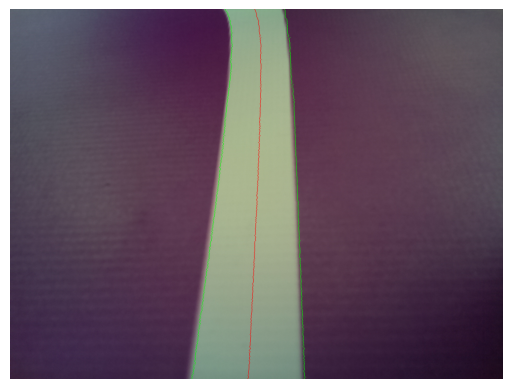

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# open the image
img_data = Image.open("/pic3.jpg")
img_data = img_data.convert('RGB')

# get the image size
width, height = img_data.size
print("w: "+ str(width)+" h: "+str(height))

# set some filtering IIR parameters
alpha = 0.95
beta = 0.05

# loop through every pixel in every row to find the line
for row in range(height):
    index = []
    reds = []
    greens = []
    blues = []
    sum = [] # the brightness of a pixel
    sum_smooth = [] # the smoothed out brightness of a pixel
    diff_sum = [] # the derivative of the brightness of a pixel
    for i in range(width):
        r, g, b = img_data.getpixel((i, row)) # get the raw color of a pixel
        index.append(i)
        reds.append(r)
        greens.append(g)
        blues.append(b)
        sum.append(r+g+b) # calculate the brightness
        if i == 0:
            sum_smooth.append(sum[-1])
            diff_sum.append(0)
        else:
            sum_smooth.append(sum_smooth[-1]*alpha+sum[-1]*beta) # smooth out the brightness with IIR
            diff_sum.append(sum_smooth[-1] - sum_smooth[-2]) # the derivative

    # find the edges, where the derivative is most positive and negative
    posleft = diff_sum.index(max(diff_sum))
    posright = diff_sum.index(min(diff_sum))
    #print("r: " + str(row) + " l: = "+str(posleft)+" r: "+str(posright))

    # draw green dots where we think the edge is
    img_data.putpixel((posleft,row),(0,255,0))
    img_data.putpixel((posright,row),(0,255,0))
    # draw a red dot where we thing the center of the line is
    img_data.putpixel((int(posleft+(posright-posleft)/2),row),(255,0,0))

# show the image with where we think the edges and center are
# img_data.show()
plt.imshow(img_data)
plt.axis('off') # hide the axis
plt.show()

# plot the data for debugging
# import matplotlib.pyplot as plt
# plt.plot(index,reds,'r-', index,greens,'g-', index,blues,'b-',index,sum,'k-',index,sum_smooth,'r-',index, diff_sum,'y-*')
# plt.show()